In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.2.0'

Lets install all the libraries and pre-requisites

In [ ]:
import numpy                        as     np
import pandas                       as     pd
from   PIL                          import Image
import matplotlib.pyplot            as     plt
import cv2
from tensorflow.keras.datasets      import mnist
from tensorflow.keras.models        import Sequential
from tensorflow.keras.layers        import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses        import categorical_crossentropy
from tensorflow.keras.utils         import to_categorical
from tensorflow.keras.activations   import relu,softmax
from tensorflow.keras.optimizers    import Adam,RMSprop,SGD
from sklearn.metrics                import classification_report,confusion_matrix,accuracy_score

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Now, We need to split the training and testing sets

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Method to show images given the rows ,cols, image_labels and the images tensor

In [ ]:
def show_images(r,c,images,image_labels):
  rows, cols, axes  =  r,c,[]
  fig = plt.figure(figsize=(10,10))
  for i in range(rows*cols):
    axes.append(fig.add_subplot(rows,cols,i+1))
    plt.imshow(images[i])
    plt.title(f"Label : {image_labels[i]}")
  plt.show()


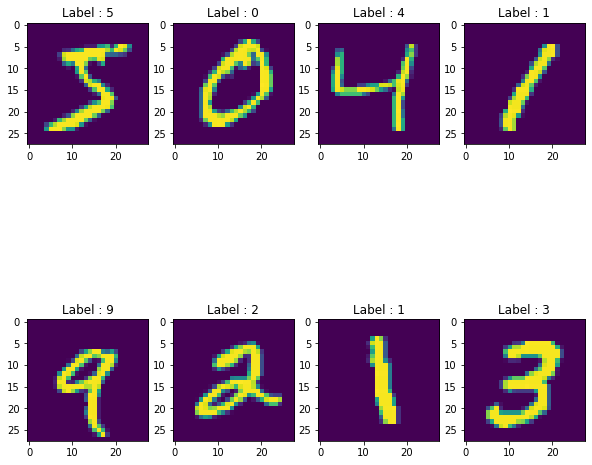

In [ ]:
show_images(2,4,x_train,y_train)

In [ ]:
import collections
counts = np.asarray(collections.Counter(y_train))
counts

array(Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421}),
      dtype=object)

In [ ]:
x_train.shape,x_train.shape[0]

((60000, 28, 28), 60000)

In [ ]:
#Min-Max Scaling
x_train = x_train/255. 
x_test  = x_test/255.0

# Reshaping the train and test images to take them into single channel
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

#categorizing the data to avoid decimal answer during the prediction as we want either 0 or 1
y_train = to_categorical(y_train) 
y_test  = to_categorical(y_test)

x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation=relu,input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dense(60,activation=relu))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(30,activation=relu))
model.add(Dropout(0.3))

model.add(Dense(10,activation=softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dense (Dense)                (None, 5, 5, 60)          3900      
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 60)          0

In [ ]:
model.compile(optimizer="RMSprop",loss=categorical_crossentropy,metrics=["acc"])

In [ ]:
model_info = model.fit(x=x_train,y=y_train,epochs=12,validation_split=0.20)

Epoch 1/12
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2895 - acc: 0.9111 - val_loss: 0.0635 - val_acc: 0.9807
Epoch 2/12
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1130 - acc: 0.9679 - val_loss: 0.0825 - val_acc: 0.9754
Epoch 3/12
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0909 - acc: 0.9735 - val_loss: 0.0438 - val_acc: 0.9892
Epoch 4/12
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0841 - acc: 0.9763 - val_loss: 0.0408 - val_acc: 0.9883
Epoch 5/12
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0792 - acc: 0.9775 - val_loss: 0.0625 - val_acc: 0.9847
Epoch 6/12
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0755 - acc: 0.9797 - val_loss: 0.0472 - val_acc: 0.9880
Epoch 7/12
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0795 - acc: 0.9794 - val_loss: 0.0457 - val_acc: 0.9877
Epoch 8/12
1500/1500 [==========================

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
_,acc = model.evaluate(x_test,y_test,verbose=0)
acc

0.9872999787330627

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

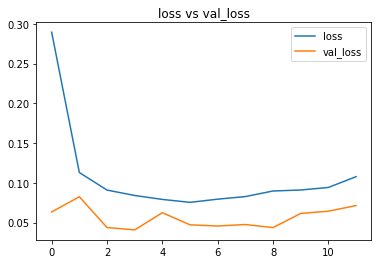

In [ ]:
plt.plot(model_info.history["loss"],label="loss")
plt.plot(model_info.history["val_loss"],label="val_loss")
plt.title("loss vs val_loss")
plt.legend()

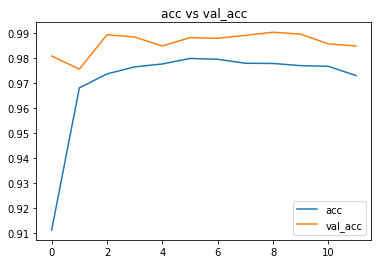

In [ ]:
plt.plot(model_info.history["acc"],label="acc")
plt.plot(model_info.history["val_acc"],label="val_acc")
plt.title("acc vs val_acc")
plt.legend()

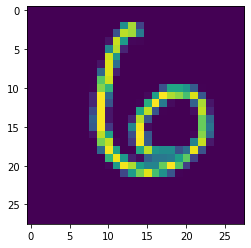

In [ ]:
x_test = x_test.reshape(10000,28,28)

Prediction Result Sample for 10 images


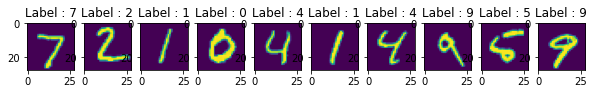

In [ ]:
print("Prediction Result Sample for 10 images")
show_images(1,10,x_test,y_pred)